# Sign Language Recognition System 

### 1. Import and Install Dependencies

In [13]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

### 2. Keypoints using MP Holistic

In [14]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [15]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [16]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [17]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)) 
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)) 
    
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) 

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [19]:
draw_landmarks(frame, results)

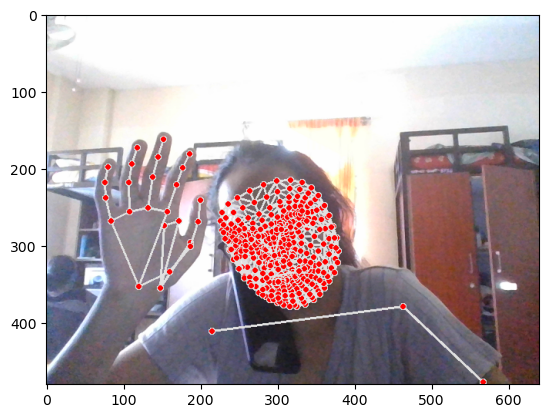

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### 3. Extract Keypoint Values

In [21]:
len(results.right_hand_landmarks.landmark)

21

In [22]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

Here I have posed my right hand so, its going to extract the left hand landmarks which has 21 point, and each point has x,y and z values so its 21*3 = 63
    if 
        it has landmarks, it is collected into the array "rh"
    else 
        it gives you an array of [0]

In [23]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.48855722,  0.70031601, -0.02542602, ...,  0.51904827,
        0.53138149, -0.00154045])

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)
result_test


array([ 0.46399942,  0.65283036, -0.95752639, ...,  0.12644643,
        0.41418314, -0.05424637])

In [27]:
result_test.shape

(1662,)

In [28]:
np.save('0', result_test)

In [29]:
np.load('0.npy')

array([ 0.46399942,  0.65283036, -0.95752639, ...,  0.12644643,
        0.41418314, -0.05424637])

### 4. Setup Folders for Collection

In [30]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thankyou', 'Iloveyou'])

# Ten videos worth of data
no_sequences =10

# Videos are going to be 10 frames in length
sequence_length = 10

# Folder start
start_folder = 5

In [33]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect Keypoint Values for Training and Testing

In [34]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (20,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (20,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [35]:
cap.release()
cv2.destroyAllWindows()

### 6. Preprocess Data and Create Labels and Features

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [37]:
label_map = {label:num for num, label in enumerate(actions)}

In [38]:
label_map

{'hello': 0, 'thankyou': 1, 'Iloveyou': 2}

In [39]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [40]:
np.array(sequences).shape

(90, 10, 1662)

In [41]:
np.array(labels).shape

(90,)

In [42]:
X = np.array(sequences)

In [43]:
X.shape

(90, 10, 1662)

In [44]:
y = to_categorical(labels).astype(int)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
y_test.shape

(18, 3)

### 7. Build and Train LSTM Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [49]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [52]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [53]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [69]:
history=model.fit(X_train, y_train,validation_split=0.02, epochs=250,batch_size=64,callbacks=[tb_callback],shuffle=True)
history

Epoch 1/250
2/2 [==============================] - 0s 189ms/step - loss: 0.0569 - categorical_accuracy: 0.9714 - val_loss: 13.3606 - val_categorical_accuracy: 0.5000
Epoch 2/250
2/2 [==============================] - 0s 108ms/step - loss: 18.5373 - categorical_accuracy: 0.3714 - val_loss: 0.0069 - val_categorical_accuracy: 1.0000
Epoch 3/250
2/2 [==============================] - 0s 110ms/step - loss: 7.0281 - categorical_accuracy: 0.6571 - val_loss: 0.0312 - val_categorical_accuracy: 1.0000
Epoch 4/250
2/2 [==============================] - 0s 112ms/step - loss: 2.7973 - categorical_accuracy: 0.7000 - val_loss: 1.0808 - val_categorical_accuracy: 0.5000
Epoch 5/250
2/2 [==============================] - 0s 110ms/step - loss: 1.6382 - categorical_accuracy: 0.3857 - val_loss: 0.9546 - val_categorical_accuracy: 0.5000
Epoch 6/250
2/2 [==============================] - 0s 102ms/step - loss: 1.1614 - categorical_accuracy: 0.4286 - val_loss: 0.7750 - val_categorical_accuracy: 0.5000
Epoch 7/

2/2 [==============================] - 0s 112ms/step - loss: 0.2550 - categorical_accuracy: 0.8714 - val_loss: 0.1314 - val_categorical_accuracy: 1.0000
Epoch 51/250
2/2 [==============================] - 0s 109ms/step - loss: 0.2115 - categorical_accuracy: 0.8714 - val_loss: 0.2068 - val_categorical_accuracy: 1.0000
Epoch 52/250
2/2 [==============================] - 0s 110ms/step - loss: 0.2187 - categorical_accuracy: 0.9429 - val_loss: 0.1984 - val_categorical_accuracy: 1.0000
Epoch 53/250
2/2 [==============================] - 0s 103ms/step - loss: 0.2155 - categorical_accuracy: 0.9429 - val_loss: 0.1585 - val_categorical_accuracy: 1.0000
Epoch 54/250
2/2 [==============================] - 0s 103ms/step - loss: 0.2111 - categorical_accuracy: 0.9286 - val_loss: 0.3069 - val_categorical_accuracy: 1.0000
Epoch 55/250
2/2 [==============================] - 0s 110ms/step - loss: 0.2518 - categorical_accuracy: 0.9286 - val_loss: 0.2801 - val_categorical_accuracy: 1.0000
Epoch 56/250
2/2 

2/2 [==============================] - 0s 96ms/step - loss: 0.1613 - categorical_accuracy: 0.9286 - val_loss: 0.2665 - val_categorical_accuracy: 1.0000
Epoch 100/250
2/2 [==============================] - 0s 101ms/step - loss: 0.1174 - categorical_accuracy: 0.9429 - val_loss: 0.0811 - val_categorical_accuracy: 1.0000
Epoch 101/250
2/2 [==============================] - 0s 103ms/step - loss: 0.1090 - categorical_accuracy: 0.9571 - val_loss: 0.0701 - val_categorical_accuracy: 1.0000
Epoch 102/250
2/2 [==============================] - 0s 111ms/step - loss: 0.1051 - categorical_accuracy: 0.9571 - val_loss: 0.0249 - val_categorical_accuracy: 1.0000
Epoch 103/250
2/2 [==============================] - 0s 96ms/step - loss: 0.1241 - categorical_accuracy: 0.9571 - val_loss: 0.0237 - val_categorical_accuracy: 1.0000
Epoch 104/250
2/2 [==============================] - 0s 95ms/step - loss: 0.1293 - categorical_accuracy: 0.9429 - val_loss: 0.3378 - val_categorical_accuracy: 1.0000
Epoch 105/250
2

2/2 [==============================] - 0s 109ms/step - loss: 0.0848 - categorical_accuracy: 0.9857 - val_loss: 0.3269 - val_categorical_accuracy: 1.0000
Epoch 149/250
2/2 [==============================] - 0s 107ms/step - loss: 0.1126 - categorical_accuracy: 0.9714 - val_loss: 1.0654 - val_categorical_accuracy: 0.0000e+00
Epoch 150/250
2/2 [==============================] - 0s 114ms/step - loss: 0.2013 - categorical_accuracy: 0.9143 - val_loss: 1.0875 - val_categorical_accuracy: 0.0000e+00
Epoch 151/250
2/2 [==============================] - 0s 107ms/step - loss: 0.1710 - categorical_accuracy: 0.9286 - val_loss: 0.0670 - val_categorical_accuracy: 1.0000
Epoch 152/250
2/2 [==============================] - 0s 111ms/step - loss: 0.1022 - categorical_accuracy: 0.9714 - val_loss: 0.0283 - val_categorical_accuracy: 1.0000
Epoch 153/250
2/2 [==============================] - 0s 106ms/step - loss: 0.3483 - categorical_accuracy: 0.8714 - val_loss: 0.4274 - val_categorical_accuracy: 0.5000
Epoc

2/2 [==============================] - 0s 95ms/step - loss: 0.0429 - categorical_accuracy: 0.9857 - val_loss: 0.2373 - val_categorical_accuracy: 1.0000
Epoch 198/250
2/2 [==============================] - 0s 112ms/step - loss: 0.0169 - categorical_accuracy: 1.0000 - val_loss: 0.9712 - val_categorical_accuracy: 0.5000
Epoch 199/250
2/2 [==============================] - 0s 107ms/step - loss: 0.0263 - categorical_accuracy: 0.9857 - val_loss: 0.5990 - val_categorical_accuracy: 0.5000
Epoch 200/250
2/2 [==============================] - 0s 106ms/step - loss: 0.0176 - categorical_accuracy: 1.0000 - val_loss: 0.1671 - val_categorical_accuracy: 1.0000
Epoch 201/250
2/2 [==============================] - 0s 107ms/step - loss: 0.0190 - categorical_accuracy: 0.9857 - val_loss: 0.1114 - val_categorical_accuracy: 1.0000
Epoch 202/250
2/2 [==============================] - 0s 95ms/step - loss: 0.0207 - categorical_accuracy: 0.9857 - val_loss: 0.3496 - val_categorical_accuracy: 1.0000
Epoch 203/250


2/2 [==============================] - 0s 111ms/step - loss: 0.1421 - categorical_accuracy: 0.9714 - val_loss: 0.2836 - val_categorical_accuracy: 1.0000
Epoch 247/250
2/2 [==============================] - 0s 112ms/step - loss: 0.0914 - categorical_accuracy: 1.0000 - val_loss: 0.1476 - val_categorical_accuracy: 1.0000
Epoch 248/250
2/2 [==============================] - 0s 111ms/step - loss: 0.1043 - categorical_accuracy: 0.9857 - val_loss: 0.3154 - val_categorical_accuracy: 1.0000
Epoch 249/250
2/2 [==============================] - 0s 108ms/step - loss: 0.0747 - categorical_accuracy: 1.0000 - val_loss: 0.7227 - val_categorical_accuracy: 0.5000
Epoch 250/250
2/2 [==============================] - 0s 100ms/step - loss: 0.0921 - categorical_accuracy: 0.9714 - val_loss: 0.4773 - val_categorical_accuracy: 0.5000


In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 10, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [71]:
res = model.predict(X_test)

1/1 [==============================] - 0s 54ms/step


In [72]:
actions[np.argmax(res[0])]

'hello'

In [73]:
actions[np.argmax(y_test[0])]

'hello'

### 9. Save Weights

In [74]:
model.save('action.h5')

In [75]:
model.load_weights('action.h5')

### 10. Evaluation using Confusion Matrix and Accuracy

In [76]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [77]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 48ms/step


In [78]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [79]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[ 8,  0],
        [ 1,  9]],

       [[11,  2],
        [ 0,  5]],

       [[14,  1],
        [ 2,  1]]], dtype=int64)

In [80]:
accuracy_score(ytrue, yhat)

0.8333333333333334

### Plot the result 

<function matplotlib.pyplot.show(close=None, block=None)>

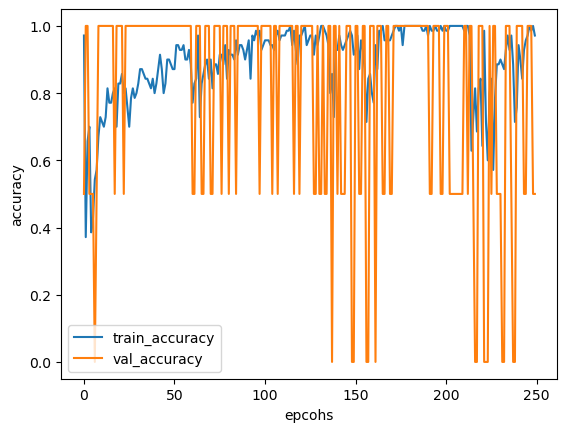

In [89]:
epochs=list(range(250))
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
plt.plot(epochs,acc,label='train_accuracy')
plt.plot(epochs,val_acc,label='val_accuracy')
plt.xlabel('epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show

### English to braille 

In [85]:
from tkinter import *

root = Tk()
root.title('Braille Translator')
root.geometry("450x200")
title_label = Label(root, text="Braille Translator", font=("Helvetica", 20))
title_label.place(x=130,y=0)

text_label = Label(root, text="Text:")
text_entry = Entry(root, width=50)
text_label.place(x=20,y=75)
text_entry.place(x=100,y=75)

braille_label = Label(root, text="Braille:")
braille_entry = Entry(root, width=50)
braille_label.place(x=20,y=105)
braille_entry.place(x=100,y=105)

In [86]:
alphaBraille = ['⠁', '⠃', '⠉', '⠙', '⠑', '⠋', '⠛', '⠓', '⠊', '⠚', '⠅', '⠇',
                '⠍', '⠝', '⠕', '⠏', '⠟', '⠗', '⠎', '⠞', '⠥', '⠧', '⠺', '⠭', '⠽', '⠵', ' ']
numBraille = ['⠼⠁', '⠼⠃', '⠼⠉', '⠼⠙', '⠼⠑', '⠼⠋', '⠼⠛', '⠼⠓', '⠼⠊', '⠼⠚']
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
puntuation = [',', ';', ':', '.', '?', '!', ';', '(', ')', '/', '-']
puntuationBraille = ['⠂', '⠆', '⠒', '⠲', '⠦', '⠖', '⠐⠣', '⠐⠜', '⠸⠌', '⠤']
character = ['&', '*', '@', '©', '®', '™', '°', ]
characterBraille = ['⠈⠯', '⠐⠔', '⠈⠁', '⠘⠉', '⠘⠗', '⠘⠞', '⠘⠚', ]

In [87]:
def translate_text():
    # get the text from the text entry box
    text = text_entry.get()

    # create an empty string to store the Braille
    braille = ""
    for letter in text:
        if letter in alphabet:
            index = alphabet.index(letter)
            braille_letter = alphaBraille[index]
            braille += braille_letter
        elif letter in nums:
            index = nums.index(letter)
            braille_number = numBraille[index]
            braille += braille_number
        elif letter in puntuation:
            index = puntuation.index(letter)
            braille_puntuation = puntuationBraille[index]
            braille += braille_puntuation
        elif letter in character:
            index = character.index(letter)
            braille_character = characterBraille[index]
            braille += braille_character
        elif letter == " ":
            braille += " "
    braille_entry.insert(0, braille)

In [88]:
submit_btn = Button(root, text="Submit", command=lambda: [translate_text()])
submit_btn.place(x=220,y=150)

clear_btn = Button(root, text="Clear", command=lambda: [
                   text_entry.delete(0, END), braille_entry.delete(0, END)])
clear_btn.place(x=300, y=150)

root.mainloop()